<a href="https://colab.research.google.com/github/katyk20/distance-education-highered/blob/main/Notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! git clone https://github.com/katyk20/distance-education-highered

Cloning into 'distance-education-highered'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 138 (delta 69), reused 26 (delta 9), pack-reused 0
Receiving objects: 100% (138/138), 3.29 MiB | 14.13 MiB/s, done.
Resolving deltas: 100% (69/69), done.


In [3]:
%cd /content/distance-education-highered
!git pull

/content/distance-education-highered
Already up to date.


In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import StrMethodFormatter

In [5]:
#read in dist_enrollment18_22
enroll1822=pd.read_csv('/content/drive/MyDrive/Capstone_Winter2024/PROJECT DATASETS/dist_enrollment18_22.csv')

In [6]:
#read in dist_enrollment12_22
enroll1222=pd.read_csv('/content/drive/MyDrive/Capstone_Winter2024/PROJECT DATASETS/dist_enrollment12_22.csv')

In [7]:
enroll1822.columns

Index(['UNITID', 'INSTNM', 'YEAR', 'IALIAS', 'STABBR', 'OBEREG', 'SECTOR',
       'ICLEVEL', 'CONTROL', 'DEGGRANT', 'LONGITUD', 'LATITUDE', 'EFDELEV',
       'EFDETOT', 'EFDEEXC', 'EFDESOM', 'EFDENON', 'EFDEEX1', 'EFDEEX2',
       'EFDEEX3', 'EFDEEX4', 'EFDEEX5 '],
      dtype='object')

In [8]:
enroll1222.columns

Index(['UNITID', 'INSTNM', 'YEAR', 'STABBR', 'OBEREG', 'SECTOR', 'ICLEVEL',
       'CONTROL', 'DEGGRANT', 'IALIAS', 'LONGITUD', 'LATITUDE', 'EFDELEV',
       'EFDETOT', 'EFDEEXC', 'EFDESOM', 'EFDENON', 'EFDEEX1', 'EFDEEX2',
       'EFDEEX3', 'EFDEEX4', 'EFDEEX5 '],
      dtype='object')

In [9]:
def filter_enrollment_data(enroll):
    # Filter by EFDELEV == 1 (summary level for each institution)
    enroll_filtered = enroll[enroll['EFDELEV'] == 1]


    # Select relevant columns
    relevant_data = enroll_filtered[['YEAR', 'INSTNM', 'SECTOR','EFDETOT', 'EFDEEXC', 'EFDESOM', 'EFDENON',
     'EFDEEX1', 'EFDEEX2','EFDEEX3', 'EFDEEX4', 'EFDEEX5 ']]

    #Filter out institutions where EFDENON == EFDETOT
    relevant_data = relevant_data[relevant_data['EFDENON'] != relevant_data['EFDETOT']]

    # Sorting relevant data by year and EFDETOT
    relevant_data_sorted = relevant_data.sort_values(by=['YEAR', 'EFDETOT'], ascending=[True, False])

    # Reset index after sorting
    enroll_processed = relevant_data_sorted.reset_index(drop=True)

    return enroll_processed


In [10]:
enroll_1822= filter_enrollment_data(enroll1822)
enroll_1822.head()
enroll_1822.describe()



,YEAR,SECTOR,EFDETOT,EFDEEXC,EFDESOM,EFDENON,EFDEEX1,EFDEEX2,EFDEEX3,EFDEEX4,EFDEEX5
count,17413.000000,17413.000000,17413.000000,17413.000000,17413.000000,17413.000000,15165.000000,15165.000000,15165.000000,15165.000000,15165.000000
mean,2020.065296,2.833573,5424.062195,1520.068512,1373.913341,2530.080342,1145.962677,526.556742,13.535378,37.638642,21.704121
std,1.409796,1.759189,9493.683489,5410.883716,2908.031269,4842.639388,2692.609452,4505.601975,159.606368,451.315623,384.845840
min,2018.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,2.000000,650.000000,41.000000,86.000000,170.000000,65.000000,6.000000,0.000000,0.000000,0.000000
50%,2020.000000,2.000000,2127.000000,338.000000,451.000000,847.000000,336.000000,30.000000,0.000000,0.000000,0.000000
75%,2021.000000,4.000000,6000.000000,1188.000000,1343.000000,2553.000000,1099.000000,135.000000,0.000000,6.000000,0.000000
max,2022.000000,9.000000,164091.000000,157898.000000,55201.000000,63100.000000,65891.000000,148738.000000,10015.000000,32712.000000,19347.000000


In [11]:
enroll_1222= filter_enrollment_data(enroll1222)
enroll_1222.head()

,YEAR,INSTNM,SECTOR,EFDETOT,EFDEEXC,EFDESOM,EFDENON,EFDEEX1,EFDEEX2,EFDEEX3,EFDEEX4,EFDEEX5
0,2012,University of Phoenix-Online Campus,3,256402,250600.0,5746.0,56.0,10729.0,236521.0,1771.0,1558.0,21.0
1,2012,Ivy Tech Community College,4,100272,15513.0,27308.0,57451.0,14677.0,587.0,0.0,0.0,249.0
2,2012,Ashford University,3,77734,76722.0,0.0,1012.0,1058.0,74492.0,0.0,1172.0,0.0
3,2012,Liberty University,2,74372,61786.0,8149.0,4437.0,11282.0,49338.0,373.0,793.0,0.0
4,2012,Arizona State University,1,73378,7444.0,28651.0,37283.0,3751.0,3623.0,0.0,70.0,0.0


In [12]:
#count of unique institutions in dataset
print(enroll_1822['INSTNM'].nunique(), enroll_1222['INSTNM'].nunique())

4318 5524


#What are the top 10 DE institutions by total enrollment in each year?

In [13]:

def plot_top_10_institutions_enrollment(enroll_processed):
    years = enroll_processed['YEAR'].unique()

    for year in years:
        top_10 = enroll_processed[enroll_processed['YEAR'] == year].head(10)


        plt.figure(figsize=(10, 6))
        sns.set_style("dark")
        sns.barplot(x='EFDETOT', y='INSTNM', data=top_10,order=top_10['INSTNM'])
        plt.xlabel('Grand Total Enrollment')
        plt.ylabel('Institution Name')
        plt.title(f'Top 10 DE Institutions (All Sectors) by Enrollment for Year {year}')
        plt.gca().invert_yaxis()  # Invert y-axis to display top institutions at the top
        plt.tight_layout()
        plt.show()


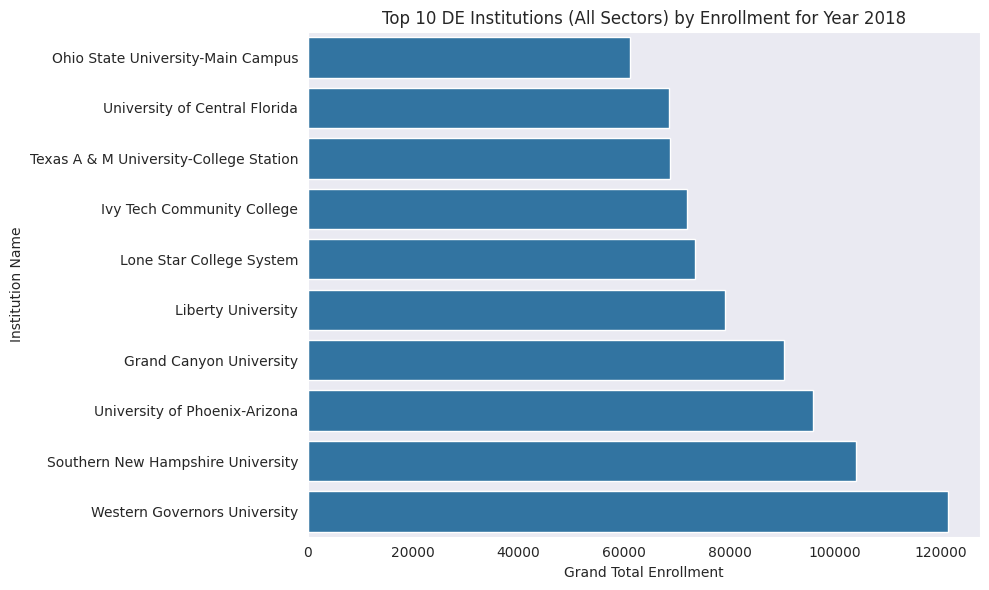

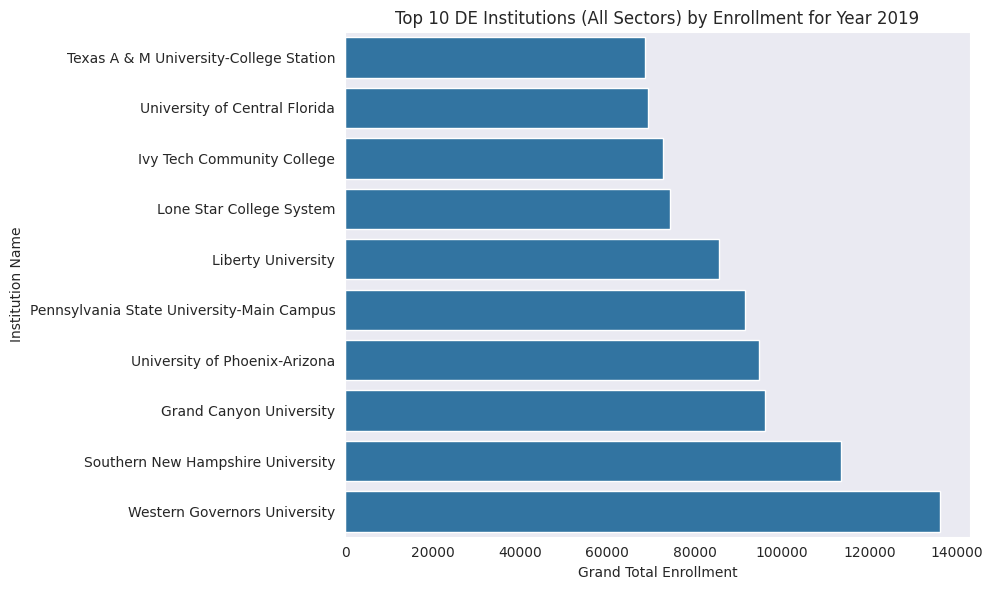

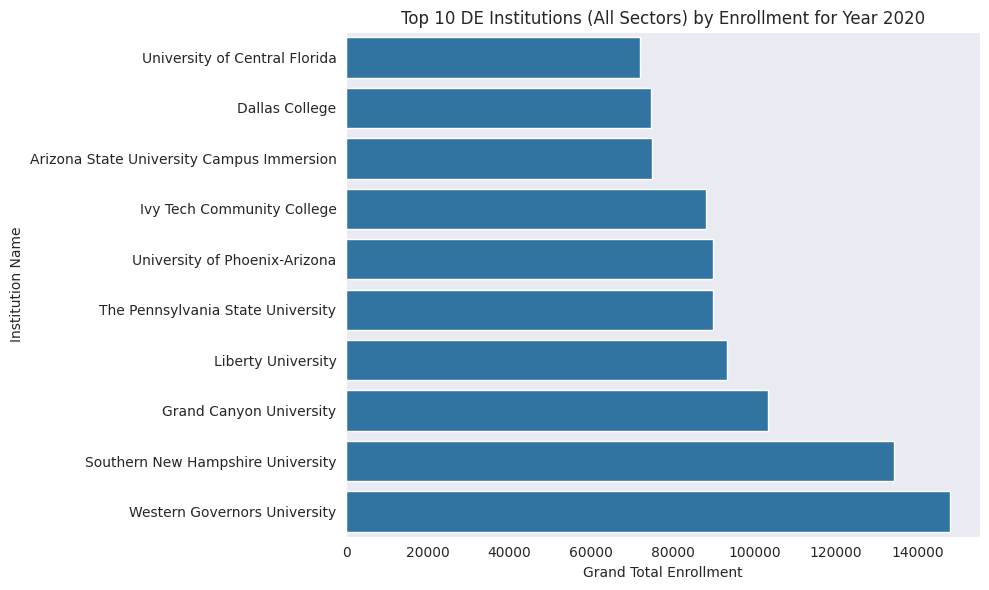

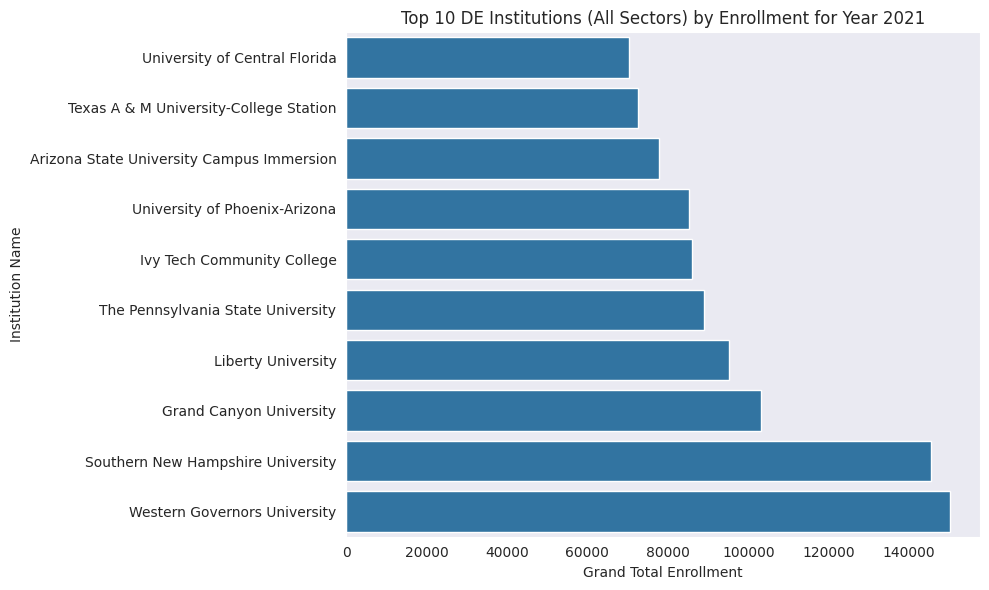

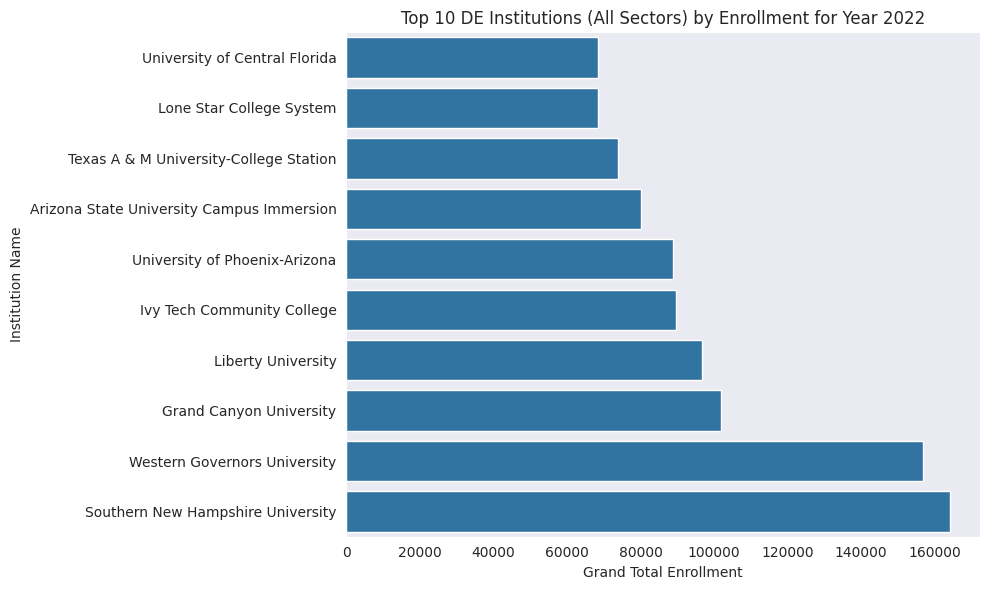

In [14]:
plot_top_10_institutions_enrollment(enroll_1822)

In [15]:
# plot_top_10_institutions_enrollment(enroll_1222)

In [16]:
enroll_1822

,YEAR,INSTNM,SECTOR,EFDETOT,EFDEEXC,EFDESOM,EFDENON,EFDEEX1,EFDEEX2,EFDEEX3,EFDEEX4,EFDEEX5
0,2018,Western Governors University,2,121437,121437.0,0.0,0.0,8090.0,113124.0,5.0,218.0,0.0
1,2018,Southern New Hampshire University,2,104068,96912.0,500.0,6656.0,7152.0,89025.0,46.0,689.0,0.0
2,2018,University of Phoenix-Arizona,3,95777,94472.0,342.0,963.0,4466.0,89454.0,171.0,381.0,0.0
3,2018,Grand Canyon University,3,90253,70295.0,10704.0,9254.0,12674.0,57278.0,2.0,341.0,0.0
4,2018,Liberty University,2,79152,64006.0,7106.0,8040.0,12517.0,50337.0,382.0,770.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17408,2022,Lakewood School of Therapeutic Massage,9,8,0.0,8.0,0.0,NaN,NaN,NaN,NaN,NaN
17409,2022,Southwest Acupuncture College-Santa Fe,3,7,0.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN
17410,2022,Pathways College-Arizona,2,6,6.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0
17411,2022,Health-Tech Institute of Memphis,9,4,0.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN


#What is percentage all students enrolled in DE courses, by sector, in a particular year?


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sector_enrollment(data, year):
    data_year= data.copy()
    # Filter data for the specified year
    data_year = data[data['YEAR'] == year]

    # Calculate percentages
    data_year.loc[:, '% EFDEEXC'] = data_year['EFDEEXC'] / data_year['EFDETOT']
    data_year.loc[:, '% EFDESOM'] = data_year['EFDESOM'] / data_year['EFDETOT']

    # Map sector labels
    legend_key = {
        1: 'Public, 4-year',
        2: 'Private not-for-profit, 4-year',
        3: 'Private for-profit, 4-year',
        4: 'Public, 2-year',
        5: 'Private not-for-profit, 2-year',
        6: 'Private for-profit, 2-year',
        7: 'Public, less-than 2-year',
        8: 'Private not-for-profit, less-than 2-year',
        9: 'Private for-profit, less-than 2-year',
        99: 'Sector unknown'
    }
    data_year['SECTOR_LABEL'] = data_year['SECTOR'].map(legend_key)

    # Melt the DataFrame for plotting
    data_melted = data_year.melt(id_vars=['SECTOR_LABEL'], value_vars=['% EFDEEXC', '% EFDESOM'])

    # Create bar plot
    plt.figure(figsize=(10, 8))
    ax = sns.barplot(data=data_melted, x='SECTOR_LABEL', y='value', hue='variable', errorbar=None)

    # Add percentages above the bars
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height() * 100),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                    textcoords='offset points')


    plt.xlabel('Sector')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('')  # Remove y-axis label
    plt.yticks([])  # Remove y-axis ticks
    plt.title('Percentage of Students Enrolled Exclusively in DE by Sector for the Year {}'.format(year))

    plt.legend(title=None, labels=['Enrolled exclusively in DE courses',
                                       ' Enrolled in some but not all DE courses'],
               loc='upper left')
    plt.tight_layout()
    plt.show()




<ipython-input-17-2c736f150588>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_year.loc[:, '% EFDEEXC'] = data_year['EFDEEXC'] / data_year['EFDETOT']
<ipython-input-17-2c736f150588>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_year.loc[:, '% EFDESOM'] = data_year['EFDESOM'] / data_year['EFDETOT']
<ipython-input-17-2c736f150588>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

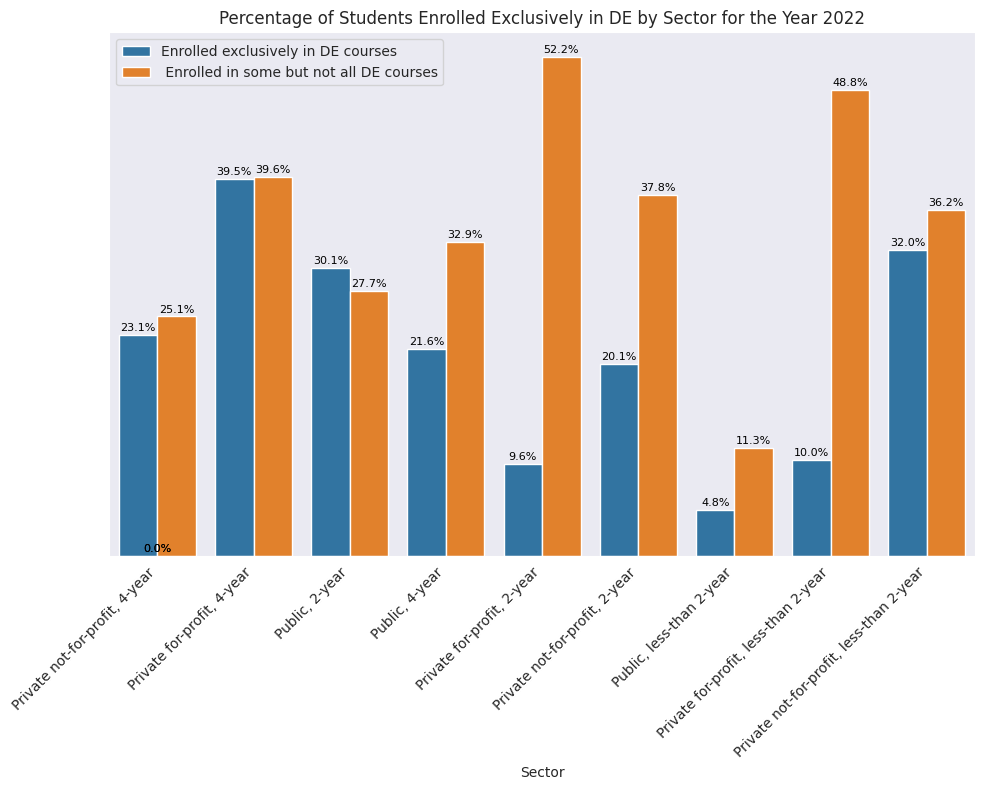

In [18]:

plot_sector_enrollment(enroll_1822, 2022)

#What is the percentage of percentage of all students enrolled in DE courses, 2019 and 2022?

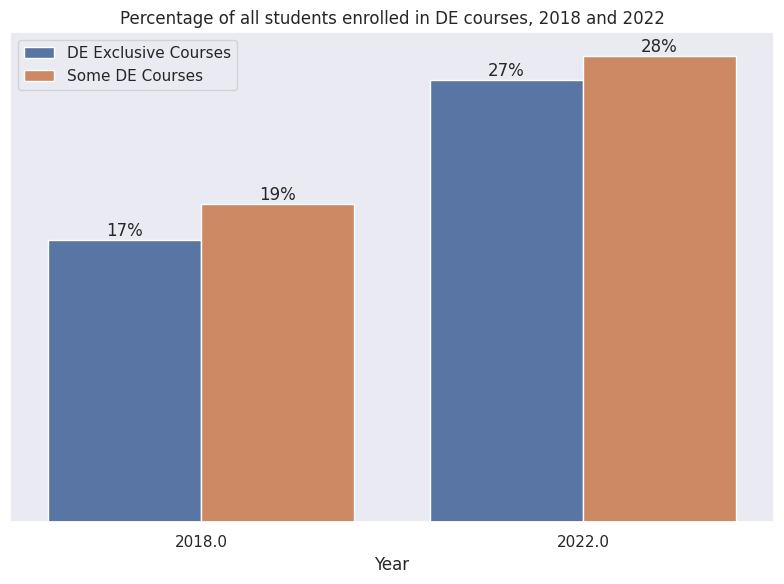

In [19]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plot_enrollment_percentage(years, enroll_df):
    df = pd.DataFrame()
    for year in years:
        data_year_filtered = enroll_df.copy()
        data_year_filtered = data_year_filtered[data_year_filtered['YEAR'] == year]

        # Calculate total percentage of students enrolled exclusively in EFDEEXC for the current year
        total_percentage_efdeexc = (data_year_filtered['EFDEEXC'].sum() / data_year_filtered['EFDETOT'].sum()) * 100

        # Calculate total percentage of students enrolled exclusively in EFDESOM for the current year
        total_percentage_efdesom = (data_year_filtered['EFDESOM'].sum() / data_year_filtered['EFDETOT'].sum()) * 100

        # Add the calculated percentages to the DataFrame
        df.loc[year, 'YEAR'] = year
        df.loc[year, 'DE Exclusive Courses'] = total_percentage_efdeexc
        df.loc[year, 'Some DE Courses'] = total_percentage_efdesom

    # Melt the DataFrame to long format for Seaborn plotting
    df_melted = df.melt(id_vars='YEAR', var_name='Variable', value_name='Total Percentage')

    # Plot using Seaborn
    sns.set(style='dark')
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(data=df_melted, x='YEAR', y='Total Percentage', hue='Variable')

    # Add percentages above bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f%%')

    # Add legend and labels
    plt.xlabel('Year')
    plt.title('Percentage of all students enrolled in DE courses, 2018 and 2022')
    plt.ylabel('')  # Remove y-axis label
    plt.yticks([])  # Remove y-axis ticks
    plt.legend(title=None)
    plt.tight_layout()
    plt.show()

# Sample usage:
years = [2018, 2022]
plot_enrollment_percentage(years, enroll_1822)


#What are top 10 institutions grand enrollment by Sector (eg. 4+ year, 2-4, less than 2 years)by year?

#What are the home locations of DE students across years?

In [20]:

stu_located = enroll_1822[['YEAR', 'EFDEEXC','EFDEEX1', 'EFDEEX2','EFDEEX3', 'EFDEEX4']].dropna()
stu_located = stu_located[stu_located['EFDEEXC'] != 0]

# # Grouping by year and summing the 'EXE1', 'EXE2', 'EXE4' values
grouped_data = stu_located.groupby('YEAR').sum().reset_index()
grouped_data['% EX1']=grouped_data['EFDEEX1']/grouped_data['EFDEEXC'] *100
grouped_data['% EX2']=grouped_data['EFDEEX2']/grouped_data['EFDEEXC'] *100
grouped_data['% EX3']=grouped_data['EFDEEX3']/grouped_data['EFDEEXC'] *100
grouped_data['% EX4']=grouped_data['EFDEEX4']/grouped_data['EFDEEXC'] *100
grouped_data


,YEAR,EFDEEXC,EFDEEX1,EFDEEX2,EFDEEX3,EFDEEX4,% EX1,% EX2,% EX3,% EX4
0,2018,3295883.0,1881108.0,1315699.0,17589.0,47918.0,57.074477,39.919469,0.533666,1.453874
1,2019,3476721.0,1995224.0,1385350.0,12768.0,45861.0,57.388096,39.846453,0.367243,1.319088
2,2020,8961704.0,6475195.0,1985209.0,81460.0,233819.0,72.254060,22.152138,0.908979,2.609091
3,2021,5745664.0,3875588.0,1649546.0,49344.0,131370.0,67.452395,28.709406,0.858804,2.286420
4,2022,4988981.0,3151409.0,1649429.0,44103.0,111822.0,63.167388,33.061441,0.884008,2.241380


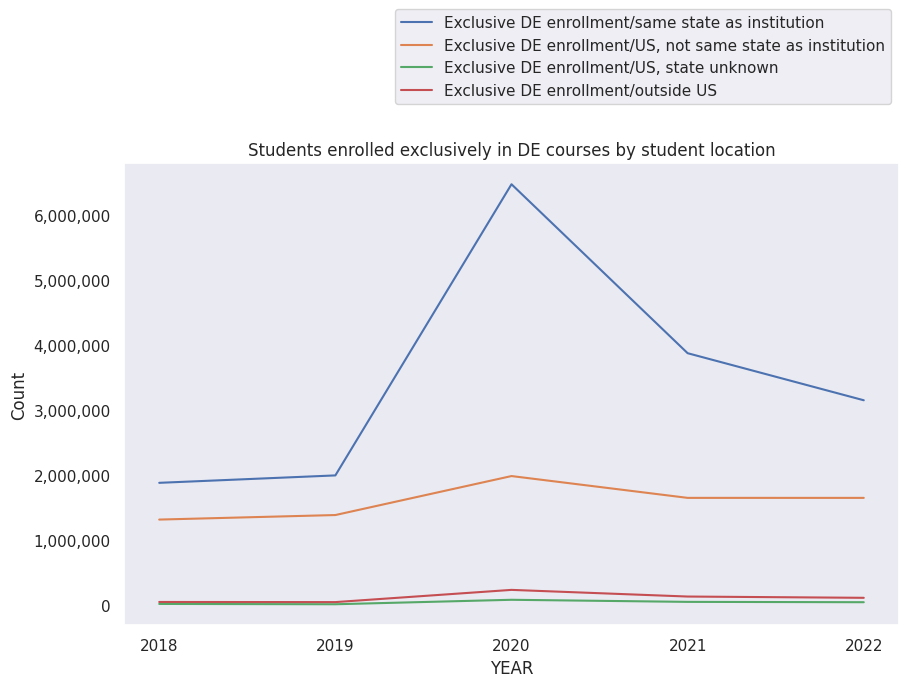

In [21]:

# Plotting the totals of EXE1, EXE2, and EXE4 for each year
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['YEAR'], grouped_data['EFDEEX1'], label='Exclusive DE enrollment/same state as institution')
plt.plot(grouped_data['YEAR'], grouped_data['EFDEEX2'], label='Exclusive DE enrollment/US, not same state as institution')
plt.plot(grouped_data['YEAR'], grouped_data['EFDEEX3'], label='Exclusive DE enrollment/US, state unknown')
plt.plot(grouped_data['YEAR'], grouped_data['EFDEEX4'], label='Exclusive DE enrollment/outside US')


plt.xlabel('YEAR')
plt.ylabel('Count')

   # Remove scientific notation, add commas on y-axis
formatter = StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Students enrolled exclusively in DE courses by student location')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1.35))
plt.grid(False)
plt.xticks([2018, 2019, 2020, 2021,2022])
plt.show()

#What are the home locations of DE students across sectors 2018 compared to 2022?

In [22]:
enroll_1822.isnull().sum()

YEAR           0
INSTNM         0
SECTOR         0
EFDETOT        0
EFDEEXC        0
EFDESOM        0
EFDENON        0
EFDEEX1     2248
EFDEEX2     2248
EFDEEX3     2248
EFDEEX4     2248
EFDEEX5     2248
dtype: int64

In [23]:
stu_located2 = enroll_1822[(enroll_1822['YEAR'] == 2018) | (enroll_1822['YEAR'] == 2022)].copy()
stu_located2 = stu_located2[['YEAR', 'SECTOR','EFDEEXC','EFDEEX1', 'EFDEEX2','EFDEEX3', 'EFDEEX4']]


stu_located2 = stu_located2[stu_located2['EFDEEXC'] != 0]


# Grouping by year and summing the 'EXE1', 'EXE2', 'EXE4' values
result = stu_located2.groupby(['YEAR','SECTOR']).sum().reset_index()
result['% EX1']=result['EFDEEX1']/result['EFDEEXC'] *100
result['% EX2']=result['EFDEEX2']/result['EFDEEXC'] *100
result['% EX3']=result['EFDEEX3']/result['EFDEEXC'] *100
result['% EX4']=result['EFDEEX4']/result['EFDEEXC'] *100

result


# # Unstack the 'sector' index to make it columns
# unstacked_data = result.set_index(['YEAR', 'SECTOR']).unstack('SECTOR')
# unstacked_data

,YEAR,SECTOR,EFDEEXC,EFDEEX1,EFDEEX2,EFDEEX3,EFDEEX4,% EX1,% EX2,% EX3,% EX4
0,2018,1,1034529.0,756263.0,242941.0,8529.0,15372.0,73.102156,23.483247,0.824433,1.485894
1,2018,2,839075.0,290474.0,522827.0,3735.0,17951.0,34.618360,62.309925,0.445133,2.139380
2,2018,3,614183.0,106715.0,494852.0,1592.0,10772.0,17.375115,80.570775,0.259206,1.753875
3,2018,4,776192.0,721679.0,29415.0,3733.0,3704.0,92.976867,3.789655,0.480938,0.477202
4,2018,5,20206.0,2954.0,17246.0,0.0,5.0,14.619420,85.350886,0.000000,0.024745
5,2018,6,10804.0,2563.0,7988.0,0.0,112.0,23.722695,73.935579,0.000000,1.036653
6,2018,7,186.0,186.0,0.0,0.0,0.0,100.000000,0.000000,0.000000,0.000000
7,2018,8,27.0,27.0,0.0,0.0,0.0,100.000000,0.000000,0.000000,0.000000
8,2018,9,681.0,247.0,430.0,0.0,2.0,36.270191,63.142438,0.000000,0.293686
9,2022,1,1769358.0,1330413.0,363141.0,20918.0,30571.0,75.191849,20.523885,1.182237,1.727802


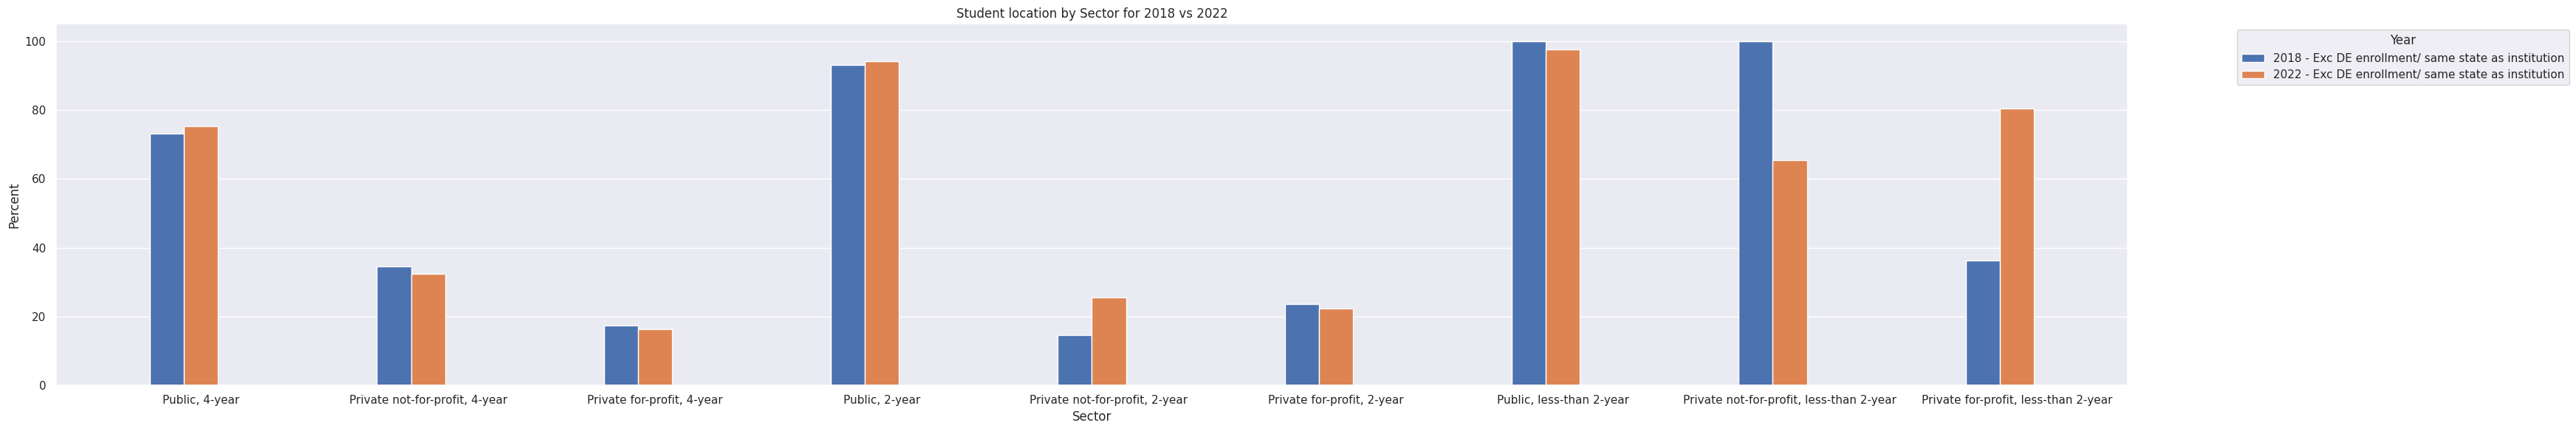

In [24]:
def plot_sector_comparison(result, sectors, years, cols):
    sector_names = {
        1: 'Public, 4-year',
        2: 'Private not-for-profit, 4-year',
        3: 'Private for-profit, 4-year',
        4: 'Public, 2-year',
        5: 'Private not-for-profit, 2-year',
        6: 'Private for-profit, 2-year',
        7: 'Public, less-than 2-year',
        8: 'Private not-for-profit, less-than 2-year',
        9: 'Private for-profit, less-than 2-year',
        99: 'Sector unknown'
    }

    num_sectors = len(sectors)
    num_years = len(years)
    bar_width = 0.15  # Adjust the bar width as needed
    index = np.arange(num_sectors)
    offset = bar_width / 2 * (num_years - 1)

    plt.figure(figsize=(35, 6))

    for i, year in enumerate(years):
        for j, col in enumerate(cols):
            # Filter data for the year
            year_data = result[result['YEAR'] == year]

            # Define colors for each plot
            colors = ['b', 'orange']

            # Filter data for the given sectors
            year_data = year_data[year_data['SECTOR'].isin(sectors)]

            # Define colors for each year
            colors = ['b', 'orange']

            # Plotting
            plt.bar(index + (i * len(cols) + j) * bar_width - offset, year_data[col], bar_width, label=f'{year}-{col}')

    plt.xlabel('Sector', )
    plt.ylabel('Percent')
    plt.title('Student location by Sector for 2018 vs 2022')
    plt.xticks(index + ((num_years * len(cols) - 1) / 2) * bar_width, [sector_names[sector] for sector in sectors], rotation=0, ha='center')



    # Customize legend handles
    col_labels = {
        '% EX1': 'Exc DE enrollment/ same state as institution',
        '% EX2': 'Excl DE enrollment/ US, not same state as institution',
        '% EX4': 'Excl DE enrollment/ outside US',
    }


    legend_labels = [f'{year} - {col_labels[col]}' for year in years for col in cols]
    handles, _ = plt.gca().get_legend_handles_labels()
    plt.legend(handles, legend_labels, title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y')

    # Show plot
    plt.tight_layout()
    plt.show()


colors = ['b', 'orange']
cols = ['% EX1']  # Columns to compare
sectors_to_plot = [1, 2, 3, 4,5,6,7,8,9]  # Sectors to plot
years_to_plot = [2018, 2022]  # Years to compare
plot_sector_comparison(result, sectors_to_plot, years_to_plot, cols)



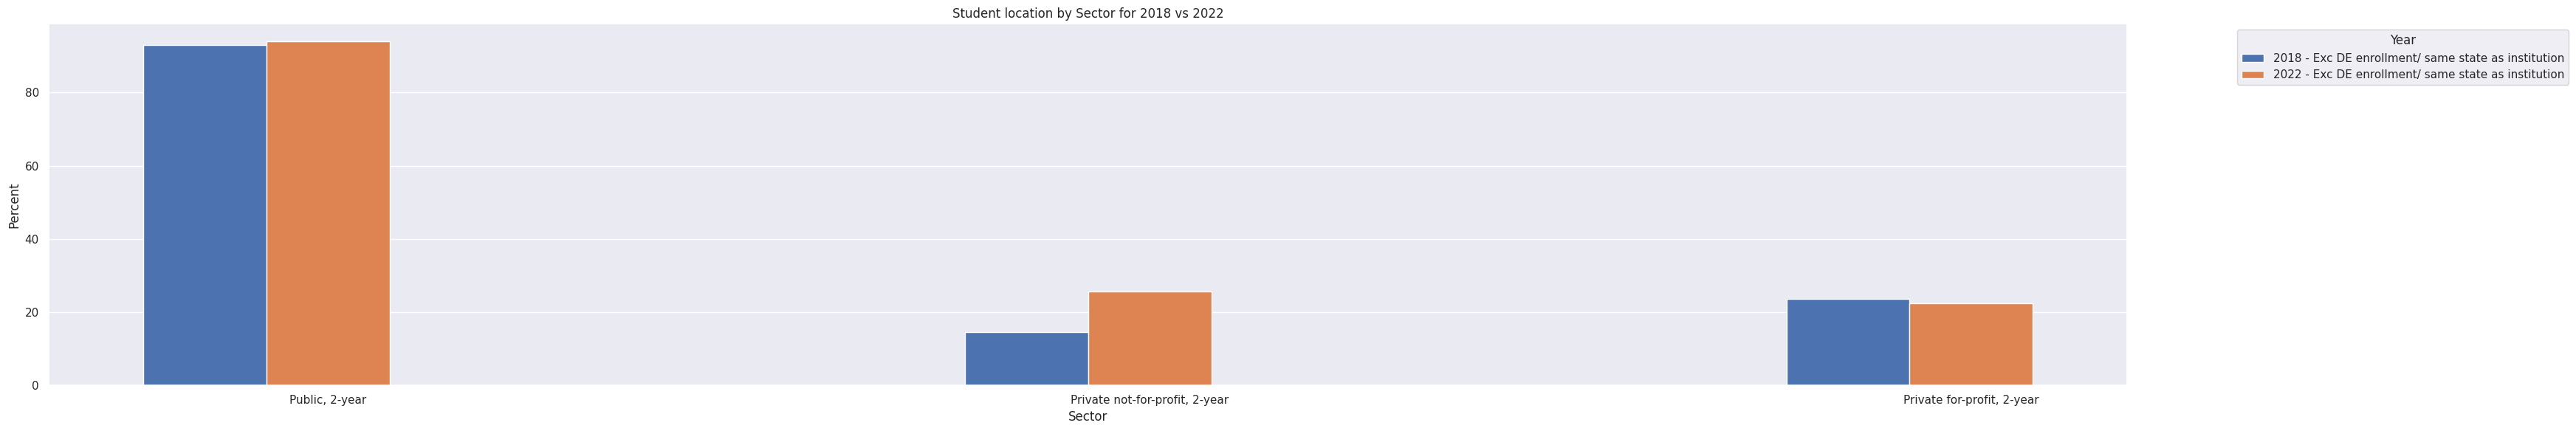

In [25]:


cols = ['% EX1']  # Columns to compare
sectors_to_plot = [4, 5, 6]  # Sectors to plot
years_to_plot = [2018, 2022]  # Years to compare
plot_sector_comparison(result, sectors_to_plot, years_to_plot, cols)

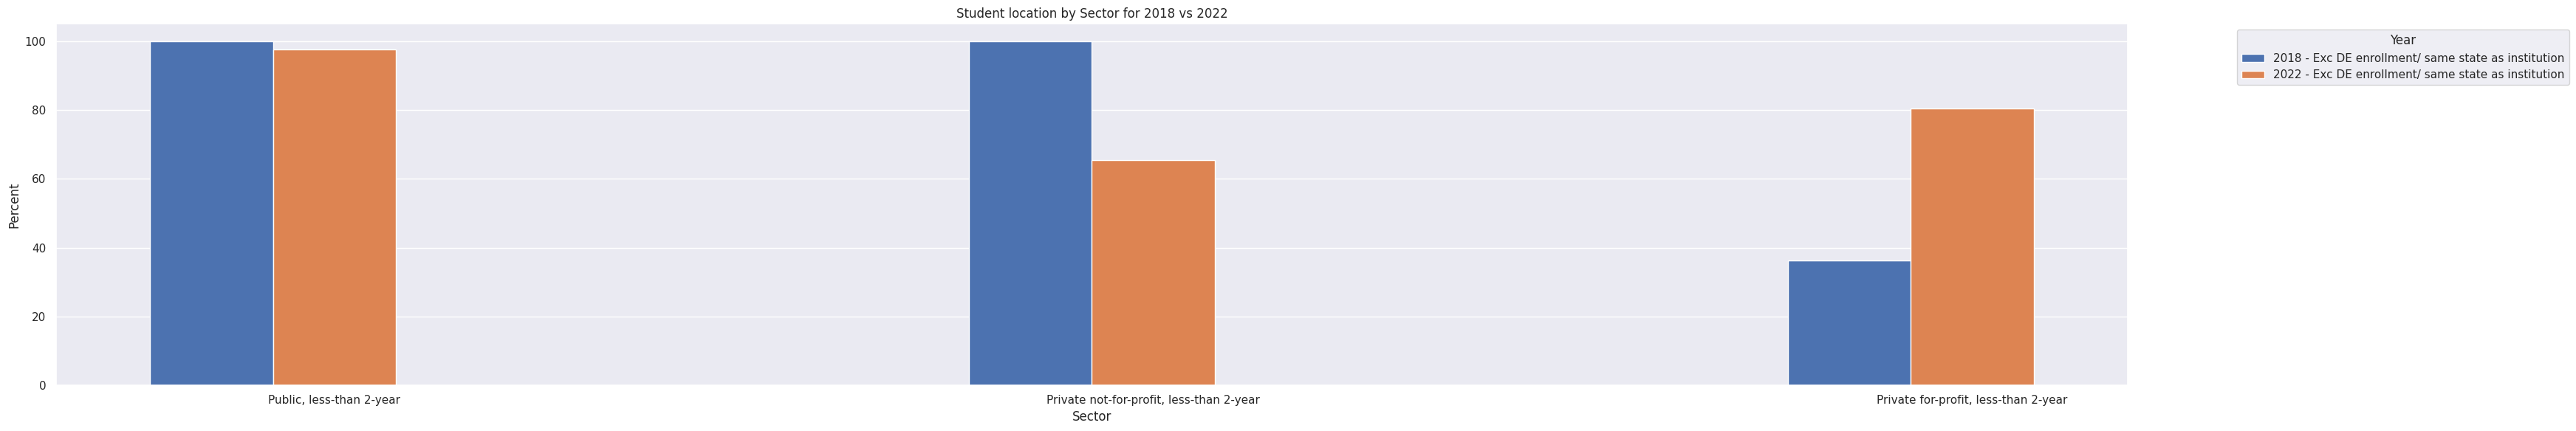

In [26]:

cols = ['% EX1']  # Columns to compare
sectors_to_plot = [7, 8, 9]  # Sectors to plot
years_to_plot = [2018, 2022]  # Years to compare
plot_sector_comparison(result, sectors_to_plot, years_to_plot, cols)


In [27]:
# Filter out enroll2 rows with IC LEVEL equals to -3 (Not available)
filt_ic = enroll[enroll2['ICLEVEL'] != -3]

# # Select relevant columns
ic_data = filt_ic[['YEAR', 'INSTNM','ICLEVEL', 'EFDETOT', 'EFDEEXC', 'EFDESOM']]



# Define colors for different IC levels
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

# Plotting
plt.figure(figsize=(10,6))
ax = ic_data.pivot_table(index='YEAR', columns='ICLEVEL', values='EFDETOT', aggfunc='sum').plot(kind='bar', color=colors, figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Total Enrollment (EFDETOT)')
plt.title('Total Enrollment by IC Level for Each Year (2018-2022)')

# Customize legend labels
legend_labels = {
    1: '4 or more years',
    2: 'At least 2 but less than 4 years',
    3: 'Less than 2 years (below associate)'
}

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, [legend_labels.get(ICLEVEL, ICLEVEL) for ICLEVEL in ic_data['ICLEVEL'].unique()], title='IC Level', loc='upper right',bbox_to_anchor=(1, 1.5))

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Disable scientific notation on y-axis
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

NameError: name 'enroll' is not defined

In [ ]:

ic_3 = ic_data[(ic_data['ICLEVEL'] == 3) & (ic_data['EFDEEXC'] >0) ]
# ic_3.describe()
total_EFDEEXCsum = ic_3['EFDEEXC'].sum() #19223
print (total_EFDEEXCsum)

total_EFDESOMsum = ic_3['EFDESOM'].sum() #9983
print (total_EFDESOMsum)

In [ ]:
# filtered_data = ic_data[ic_data['ICLEVEL'] == 3]['EFDEEXC']
# filtered_data.unique().tolist()


#What is enrollment in exclusively DE courses by insititution level and year?

In [ ]:
# Group data by 'YEAR' and 'ICLEVEL' and calculate the sum of 'EFDEEXC' for each group
ic_data_grouped = ic_data.groupby(['YEAR', 'ICLEVEL'])['EFDEEXC'].sum().unstack()

# Plotting
plt.figure(figsize=(20,6))

# Plot lines for each IC Level
for ic_level in ic_data_grouped.columns:
    plt.plot(ic_data_grouped.index, ic_data_grouped[ic_level], label=legend_labels.get(ic_level, ic_level))

plt.xlabel('Year')
plt.ylabel('DE Enrollment (EFDETEXC)')
plt.title('DE Course Enrollment by IC Level for Each Year (2018-2022)')

# Customize legend
plt.legend(title='IC Level', loc='upper right', bbox_to_anchor=(1, 1.5))

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability



plt.tight_layout()

# Disable scientific notation on y-axis
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

In [ ]:
# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot for EFDEEXC
exc_data_pivot = ic_data.pivot_table(index='YEAR', columns='ICLEVEL', values='EFDEEXC', aggfunc='sum')
exc_data_pivot.plot(kind='bar', ax=ax, color=colors_exc)

ax.set_ylabel('DE Enrollment (EFDEEXC)')
ax.set_title('EFDEEXC Enrollment by IC Level for Each Year (2018-2022)')

# Customize legend labels for EFDEEXC
handles, labels = ax.get_legend_handles_labels()
legend_labels = {
    1: '4 or more years',
    2: 'At least 2 but less than 4 years',
    3: 'Less than 2 years (below associate)'
}
ax.legend(handles, [legend_labels.get(ICLEVEL, ICLEVEL) for ICLEVEL in ic_data['ICLEVEL'].unique()], title='IC Level', loc='upper right', bbox_to_anchor=(1, 1.5))

plt.xlabel('Year')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Disable scientific notation on y-axis
ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.tight_layout()
plt.show()

In [ ]:
# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot for EFDESOM
some_data_pivot = ic_data.pivot_table(index='YEAR', columns='ICLEVEL', values='EFDESOM', aggfunc='sum')
some_data_pivot.plot(kind='bar', ax=ax, color=colors_some)

ax.set_ylabel('DE Enrollment (EFDESOM)')
ax.set_title('EFDESOM Enrollment by IC Level for Each Year (2018-2022)')

# Customize legend labels for EFDESOM
handles, labels = ax.get_legend_handles_labels()
legend_labels = {
    1: '4 or more years',
    2: 'At least 2 but less than 4 years',
    3: 'Less than 2 years (below associate)'
}
ax.legend(handles, [legend_labels.get(ICLEVEL, ICLEVEL) for ICLEVEL in ic_data['ICLEVEL'].unique()], title='IC Level', loc='upper right', bbox_to_anchor=(1, 1.5))

plt.xlabel('Year')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# plt.ylim(0, max_value + 10000 )  # Adjust the upper limit as needed

# Disable scientific notation on y-axis
ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.tight_layout()
plt.show()


In [ ]:
# # Create a figure and two subplots
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 20), sharex=True)

# colors_exc = ['blue', 'orange', 'green']
# colors_some = ['skyblue', 'wheat', 'palegreen']

# # Plot for EFDEEXC
# ic_data.pivot_table(index='YEAR', columns='ICLEVEL', values='EFDEEXC', aggfunc='sum').plot(kind='bar', ax=ax1, color=colors_exc)
# ax1.set_ylabel('DE Enrollment (EFDEEXC)')
# ax1.set_title('EFDEEXC Enrollment by IC Level for Each Year (2018-2022)')

# # Customize legend labels for EFDEEXC
# handles1, labels1 = ax1.get_legend_handles_labels()
# legend_labels = {
#     1: '4 or more years',
#     2: 'At least 2 but less than 4 years',
#     3: 'Less than 2 years (below associate)'
# }
# ax1.legend(handles1, [legend_labels.get(ICLEVEL, ICLEVEL) for ICLEVEL in ic_data['ICLEVEL'].unique()], title='IC Level', loc='upper right')

# # Plot for EFDESOM
# ic_data.pivot_table(index='YEAR', columns='ICLEVEL', values='EFDESOM', aggfunc='sum').plot(kind='bar', ax=ax2, color=colors_some)
# ax2.set_ylabel('DE Enrollment (EFDESOM)')
# ax2.set_title('EFDESOM Enrollment by IC Level for Each Year (2018-2022)')

# # Customize legend labels for EFDESOM
# handles2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(handles2, [legend_labels.get(ICLEVEL, ICLEVEL) for ICLEVEL in ic_data['ICLEVEL'].unique()], title='IC Level', loc='upper right')

# plt.xlabel('Year')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# # Set same y-axis limits for both subplots
# max_value = max(ic_data[['EFDEEXC', 'EFDESOM']].max())
# plt.ylim(0, max_value + 10000)  # Adjust the upper limit as needed

# # Disable scientific notation on y-axis
# ax1.get_yaxis().get_major_formatter().set_scientific(False)
# ax2.get_yaxis().get_major_formatter().set_scientific(False)

# plt.tight_layout()
# plt.show()




#What are the top 10 institutions with students enrolled only in courses that are considered distance education courses by year?

In [ ]:
#Plotting top 10 institutions by DEEXC for each year
years = enroll3['YEAR'].unique()

for year in years:
    top_10_de = enroll3[enroll3['YEAR'] == year].sort_values(by='EFDEEXC', ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    plt.barh(top_10_de['INSTNM'], top_10_de['EFDEEXC'], color='orange')
    plt.xlabel('Total Enrollment - only in DE courses ', )
    plt.ylabel('Institution Name')
    plt.title(f'Top 10 Institutions -Students Enrolled only in DE courses for Year {year}')
    plt.gca().invert_yaxis()  # Invert y-axis to display top institutions at the top
    plt.tight_layout()
    plt.show()

#What are the top 10 public institutions with DE exclusively enrolled students?

In [ ]:
#filter by control
# # Select relevant columns
control_data = enroll2[['YEAR', 'INSTNM','CONTROL','EFDETOT', 'EFDEEXC']]

#What are the top 10 private instituions with DE exclusively enrolled students? (Distingush between for profit and non-profit.

In [ ]:
# Filter data for private institutions
private_data = control_data[control_data['CONTROL'].isin([2, 3])]

# Separate data into non-profit and for-profit categories
non_profit_data = private_data[private_data['CONTROL'] == 2]
for_profit_data = private_data[private_data['CONTROL'] == 3]

# Aggregate enrollment data for each institution
non_profit_enrollment = non_profit_data.groupby('INSTNM')['EFDEEXC'].sum().nlargest(10)
for_profit_enrollment = for_profit_data.groupby('INSTNM')['EFDEEXC'].sum().nlargest(10)

# Plot bar charts for non-profit and for-profit institutions
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
non_profit_enrollment.plot(kind='bar', color='skyblue')
plt.title('Top 10 Non-Profit Private Institutions')
plt.xlabel('Institution')
plt.ylabel('DE Enrollment (EFDEEXC)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
for_profit_enrollment.plot(kind='bar', color='lightcoral')
plt.title('Top 10 For-Profit Private Institutions')
plt.xlabel('Institution')
plt.ylabel('DE Enrollment (EFDEEXC)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
enroll2.columns

In [ ]:
stu_located.columns

In [ ]:



year_trend = enroll2[['YEAR', 'EFDETOT', 'EFDEEXC']].dropna()

# Grouping by year and summing the 'EFDETOTAL' and EFDEEXC values
grouped_data = year_trend.groupby('YEAR').sum().reset_index()

# Plotting the total EFDETOTAL by year
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['YEAR'], grouped_data['EFDETOT' ], marker='o', linestyle='-', label='EFDETOT')
plt.plot(grouped_data['YEAR'], grouped_data['EFDEEXC'], marker='o', linestyle='-', label='EFDEEXC')

plt.xlabel('YEAR')
plt.ylabel('Total Enrollments')
plt.title('Total EFDETOT  by Year-All Institutions')
plt.xticks([2018, 2019, 2020, 2021, 2022])
# Set y-axis tick formatter to display numbers without exponent
# plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.grid(True)
plt.show()

In [ ]:

year_trend = enroll2[['YEAR', 'EFDEEXC']].dropna()

# Grouping by year and summing the 'EFDETOTAL' and EFDEEXC values
grouped_data = year_trend.groupby('YEAR').sum().reset_index()

# Plotting the total EFDETOTAL by year
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['YEAR'], grouped_data['EFDEEXC' ], marker='o', linestyle='-')

plt.xlabel('YEAR')
plt.ylabel('Total EFDEEXC')
plt.title('Total EFDEEXC by Year-All Institutions')
plt.xticks([2018, 2019, 2020, 2021, 2022])
# Set y-axis tick formatter to display numbers without exponent
# plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.grid(True)
plt.show()